In [2]:
#Import dependencies


#Standard data manipulation dependencies
import pandas as pd
import numpy as np

#Visualize data (You can also import another visualization library)
import matplotlib.pyplot as plt

#Critical for plotting TimeSeries
import datetime

#Plotly makes plotting time series a bit easier.
import plotly
import plotly.graph_objs as go
from plotly.offline import *

#Ignore 'SettingWithCopyError'
import warnings
warnings.simplefilter('ignore')

#Track runtime 
from timeit import default_timer as timer



# Time-Series Data Project

## Objectives
 
1. Import the 3 attached .csv files
2. Process the CSVs 
    - NOP_FORECAST_213.csv
        - Create two new columns: 'TODAY_ZONE_LOAD' and 'TODAY_LOAD'. These columns should hold the total volumes for all zones by hour by day, and total volumes for hours by day, respectively
    - NOP_FORECAST_214.csv
        -  Create two new columns: 'PREVIOUS_DAY_ZONE_LOAD' and 'PREVIOUS_DAY_LOAD'. These columns shoulds hold the total volumes for all zones by hour by day and total volumes for hours by day FOR THE PREVIOUS DAY respectively
    - LFG_ST.csv
        - Create two new columns: 'ADJ_ZONE_LOAD' and 'ADJ_TODAY_LOAD'. They should both be constructed by summing together 'UNADJ_LOAD', 'DISTRIB_LOSS_LOAD' and 'TRANSMISSION_LOSS_LOAD', and should contain totals for all zones by hour by day, and totals for hours by day.
    
    
3. Create an output file (output.csv) from with data from the six columns created above, along with 'FORECAST_DT','CONGESTION_ZONE' and 'HOUR_NUM'. (Final table should have 9 columns, assuming a default index.) (Example table head displayed below)


4. Plot data (TODAY_LOAD, PREV_DAY_LOAD, ADJ_LOAD), by the hour, from 2/14 - 2/24 using a library of your choice. (Example plot in plotly attached in folder)


### NOP_LOAD_FORECAST_20180213_11_input.csv

In [3]:
nop_213 = pd.read_csv("NOP_LOAD_FORECAST_20180213_11_input.csv")

In [6]:
nop_213.tail()

MARKET_CD FORECAST_DT  HOUR_NUM CONGESTION_ZONE SOURCE_CD TEMP_BAND_CD  \
65494     ERCOT   2/25/2018        18      North zone      NORM            A   
65495     ERCOT   2/25/2018        18      South zone      NORM            A   
65496     ERCOT   2/25/2018        18      South zone      NORM            A   
65497     ERCOT   2/25/2018        18      South zone      NORM            A   
65498     ERCOT   2/25/2018        18      South zone      NORM            A   

      UTILITY_CD  LSE_CD     VOLUME      LOSS  DERATION_LOSS_LOAD  CAP_OB  \
65494       TXTU     375   0.003519  0.000208                   0       0   
65495        CPL     116  15.975858  1.255075                   0       0   
65496       TXRL     116   0.239621  0.014336                   0       0   
65497       TXTU     116   1.999941  0.118412                   0       0   
65498        WTU     116   0.043736  0.003524                   0       0   

       TRAN_OB  Sch_VOLUME  Sch_LOSS  Sch_DERATION_LOSS_LOAD  
65494        0    0.003519  0.000208                       0  
65495        0   15.975858  1.255075                       0  
65496        0    0.239621  0.014336                       0  
65497        0    1.999941  0.118412                       0  
65498        0    0.043736  0.003524                       0

In [7]:
nop_213["FORECAST_DT"] = pd.to_datetime(nop_213["FORECAST_DT"])
nop_213.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65499 entries, 0 to 65498
Data columns (total 16 columns):
MARKET_CD                 65499 non-null object
FORECAST_DT               65499 non-null datetime64[ns]
HOUR_NUM                  65499 non-null int64
CONGESTION_ZONE           65499 non-null object
SOURCE_CD                 65499 non-null object
TEMP_BAND_CD              65499 non-null object
UTILITY_CD                65499 non-null object
LSE_CD                    65499 non-null int64
VOLUME                    65499 non-null float64
LOSS                      65499 non-null float64
DERATION_LOSS_LOAD        65499 non-null int64
CAP_OB                    65499 non-null int64
TRAN_OB                   65499 non-null int64
Sch_VOLUME                65499 non-null float64
Sch_LOSS                  65499 non-null float64
Sch_DERATION_LOSS_LOAD    65499 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(6), object(5)
memory usage: 8.0+ MB


In [8]:
simple_nop_213 = pd.DataFrame(nop_213[["FORECAST_DT", "HOUR_NUM", "CONGESTION_ZONE", "VOLUME"]])
simple_nop_213.head()

FORECAST_DT  HOUR_NUM CONGESTION_ZONE     VOLUME
0  2018-02-13         1    Houston zone   2.758249
1  2018-02-13         1    Houston zone  40.545011
2  2018-02-13         1      North zone   2.067527
3  2018-02-13         1      North zone   0.004869
4  2018-02-13         1      North zone  73.154196

In [12]:
#'ZONE_HOUR_LOAD' should hold the total volume per zone by hour by day
grouped_213_df = simple_nop_213.groupby(["FORECAST_DT", "HOUR_NUM", "CONGESTION_ZONE"], as_index=False).sum()
grouped_213_df.rename(columns={"VOLUME": "ZONE_HOUR_LOAD"}, inplace=True)
grouped_213_df.head(10)

FORECAST_DT  HOUR_NUM CONGESTION_ZONE  ZONE_HOUR_LOAD
0  2018-02-13         1    Houston zone      157.076491
1  2018-02-13         1      North zone      254.090751
2  2018-02-13         1      South zone      386.064643
3  2018-02-13         1       West zone       36.995269
4  2018-02-13         2    Houston zone      148.039450
5  2018-02-13         2      North zone      239.516782
6  2018-02-13         2      South zone      370.914594
7  2018-02-13         2       West zone       36.326501
8  2018-02-13         3    Houston zone      143.370658
9  2018-02-13         3      North zone      236.010204

In [101]:
# HOUR_LOAD' should hold the total volume for hours by day
hour_load = simple_nop_213.groupby(["FORECAST_DT", "HOUR_NUM"], as_index=False).sum()
hour_load.rename(columns={"VOLUME": "HOUR_LOAD"}, inplace=True)
hour_load.head()

FORECAST_DT  HOUR_NUM   HOUR_LOAD
0  2018-02-13         1  834.227154
1  2018-02-13         2  794.797326
2  2018-02-13         3  774.584315
3  2018-02-13         4  771.364195
4  2018-02-13         5  794.463507

In [116]:
grouped_213_df = grouped_213_df.merge(hour_load, how="outer")
grouped_213_df.head()

FORECAST_DT  HOUR_NUM CONGESTION_ZONE  ZONE_HOUR_LOAD   HOUR_LOAD
0  2018-02-13         1    Houston zone      157.076491  834.227154
1  2018-02-13         1      North zone      254.090751  834.227154
2  2018-02-13         1      South zone      386.064643  834.227154
3  2018-02-13         1       West zone       36.995269  834.227154
4  2018-02-13         2    Houston zone      148.039450  794.797326

### NOP_LOAD_FORECAST_20180214_04_input.csv

In [25]:
nop_214 = pd.read_csv("NOP_LOAD_FORECAST_20180214_04_input.csv")

In [29]:
nop_214.head()

MARKET_CD FORECAST_DT  HOUR_NUM CONGESTION_ZONE SOURCE_CD TEMP_BAND_CD  \
0     ERCOT   2/14/2018         1    Houston zone      CUST            A   
1     ERCOT   2/14/2018         1    Houston zone      CUST            A   
2     ERCOT   2/14/2018         1      North zone      CUST            A   
3     ERCOT   2/14/2018         1      North zone      CUST            A   
4     ERCOT   2/14/2018         1      North zone      CUST            A   

  UTILITY_CD  LSE_CD     VOLUME      LOSS  DERATION_LOSS_LOAD  CAP_OB  \
0       TNMP     375   1.791993  0.200250                   0       0   
1       TXRL     375  26.289101  1.705854                   0       0   
2       TNMP     375   1.638522  0.216521                   0       0   
3       TXRL     375   0.003867  0.000251                   0       0   
4       TXTU     375  56.063652  3.555944                   0       0   

   TRAN_OB  Sch_VOLUME  Sch_LOSS  Sch_DERATION_LOSS_LOAD  
0        0    1.791993  0.200250                       0  
1        0   26.289101  1.705854                       0  
2        0    1.638522  0.216521                       0  
3        0    0.003867  0.000251                       0  
4        0   56.063652  3.555944                       0

In [30]:
nop_214["FORECAST_DT"] = pd.to_datetime(nop_214["FORECAST_DT"])
nop_214.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65499 entries, 0 to 65498
Data columns (total 16 columns):
MARKET_CD                 65499 non-null object
FORECAST_DT               65499 non-null datetime64[ns]
HOUR_NUM                  65499 non-null int64
CONGESTION_ZONE           65499 non-null object
SOURCE_CD                 65499 non-null object
TEMP_BAND_CD              65499 non-null object
UTILITY_CD                65499 non-null object
LSE_CD                    65499 non-null int64
VOLUME                    65499 non-null float64
LOSS                      65499 non-null float64
DERATION_LOSS_LOAD        65499 non-null int64
CAP_OB                    65499 non-null int64
TRAN_OB                   65499 non-null int64
Sch_VOLUME                65499 non-null float64
Sch_LOSS                  65499 non-null float64
Sch_DERATION_LOSS_LOAD    65499 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(6), object(5)
memory usage: 8.0+ MB


In [123]:
simple_nop_214 = pd.DataFrame(nop_214[["FORECAST_DT", "HOUR_NUM", "CONGESTION_ZONE", "VOLUME"]])
simple_nop_214.head()

FORECAST_DT  HOUR_NUM CONGESTION_ZONE     VOLUME
0  2018-02-14         1    Houston zone   1.791993
1  2018-02-14         1    Houston zone  26.289101
2  2018-02-14         1      North zone   1.638522
3  2018-02-14         1      North zone   0.003867
4  2018-02-14         1      North zone  56.063652

In [124]:
grouped_214_df = simple_nop_214.groupby(["FORECAST_DT", "HOUR_NUM", "CONGESTION_ZONE"], as_index=False).sum()
grouped_214_df.rename(columns={"VOLUME": "ZONE_HOUR_LOAD"}, inplace=True)
grouped_214_df.head(10)

FORECAST_DT  HOUR_NUM CONGESTION_ZONE  ZONE_HOUR_LOAD
0  2018-02-14         1    Houston zone       98.940027
1  2018-02-14         1      North zone      195.398215
2  2018-02-14         1      South zone      301.773454
3  2018-02-14         1       West zone       25.322078
4  2018-02-14         2    Houston zone       89.413113
5  2018-02-14         2      North zone      183.664794
6  2018-02-14         2      South zone      281.022096
7  2018-02-14         2       West zone       25.438042
8  2018-02-14         3    Houston zone       85.222173
9  2018-02-14         3      North zone      176.395692

In [125]:
hour_load_214 = simple_nop_214.groupby(["FORECAST_DT", "HOUR_NUM"], as_index=False).sum()
hour_load_214.rename(columns={"VOLUME": "HOUR_LOAD"}, inplace=True)
grouped_214_df = grouped_214_df.merge(hour_load_214, how="outer")
grouped_214_df.head()

FORECAST_DT  HOUR_NUM CONGESTION_ZONE  ZONE_HOUR_LOAD   HOUR_LOAD
0  2018-02-14         1    Houston zone       98.940027  621.433774
1  2018-02-14         1      North zone      195.398215  621.433774
2  2018-02-14         1      South zone      301.773454  621.433774
3  2018-02-14         1       West zone       25.322078  621.433774
4  2018-02-14         2    Houston zone       89.413113  579.538045

In [128]:
grouped_214_df["PREVIOUS_ZONE_HOUR_LOAD"] = grouped_214_df["ZONE_HOUR_LOAD"].shift(periods=4)
grouped_214_df["PREVIOUS_HOUR_LOAD"] = grouped_214_df["HOUR_LOAD"].shift(periods=4)
grouped_214_df.drop(columns=["ZONE_HOUR_LOAD", "HOUR_LOAD"], inplace=True)
grouped_214_df.head(20)

FORECAST_DT  HOUR_NUM CONGESTION_ZONE  PREVIOUS_ZONE_HOUR_LOAD  \
0   2018-02-14         1    Houston zone                      NaN   
1   2018-02-14         1      North zone                98.940027   
2   2018-02-14         1      South zone               195.398215   
3   2018-02-14         1       West zone               301.773454   
4   2018-02-14         2    Houston zone                25.322078   
5   2018-02-14         2      North zone                89.413113   
6   2018-02-14         2      South zone               183.664794   
7   2018-02-14         2       West zone               281.022096   
8   2018-02-14         3    Houston zone                25.438042   
9   2018-02-14         3      North zone                85.222173   
10  2018-02-14         3      South zone               176.395692   
11  2018-02-14         3       West zone               270.861656   
12  2018-02-14         4    Houston zone                24.956974   
13  2018-02-14         4      North zone                84.517762   
14  2018-02-14         4      South zone               174.333050   
15  2018-02-14         4       West zone               266.948029   
16  2018-02-14         5    Houston zone                24.559637   
17  2018-02-14         5      North zone                84.202235   
18  2018-02-14         5      South zone               179.695432   
19  2018-02-14         5       West zone               274.643148   

    PREVIOUS_HOUR_LOAD  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4           621.433774  
5           621.433774  
6           621.433774  
7           621.433774  
8           579.538045  
9           579.538045  
10          579.538045  
11          579.538045  
12          557.436495  
13          557.436495  
14          557.436495  
15          557.436495  
16          550.358477  
17          550.358477  
18          550.358477  
19          550.358477

### LFG_ST_Hourly_20180213_input.csv

In [129]:
lfg_st = pd.read_csv("LFG_ST_Hourly_20180213_input.csv")

In [133]:
lfg_st.head()

CONGESTION_ZONE_CD Forecast_Dt  Hour_num  UNADJ_LOAD  DISTRIB_LOSS_LOAD  \
0                  H   2/13/2018         1    0.006320           0.000386   
1                  H   2/13/2018         1    0.001185           0.000139   
2                  H   2/13/2018         1    0.000479           0.000056   
3                  H   2/13/2018         1    0.006798           0.000416   
4                  H   2/13/2018         1    0.016094           0.000984   

   TRANSMISSION_LOSS_LOAD  
0                0.000159  
1                0.000030  
2                0.000012  
3                0.000171  
4                0.000404

In [134]:
lfg_st["Forecast_Dt"] = pd.to_datetime(lfg_st["Forecast_Dt"])
lfg_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
CONGESTION_ZONE_CD        1048575 non-null object
Forecast_Dt               1048575 non-null datetime64[ns]
Hour_num                  1048575 non-null int64
UNADJ_LOAD                1048575 non-null float64
DISTRIB_LOSS_LOAD         1048575 non-null float64
TRANSMISSION_LOSS_LOAD    1048575 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 48.0+ MB


In [135]:
lfg_st["CONGESTION_ZONE_CD"].value_counts()

S    345168
W    307944
N    258312
H    137151
Name: CONGESTION_ZONE_CD, dtype: int64

In [136]:
# 'ADJ_ZONE_LOAD' should sum together 'UNADJ_LOAD', 'DISTRIB_LOSS_LOAD' and 
# 'TRANSMISSION_LOSS_LOAD' to contain totals for all zones by hour by day

lfg_st["ADJ_LOAD"] = lfg_st[["UNADJ_LOAD", "DISTRIB_LOSS_LOAD", "TRANSMISSION_LOSS_LOAD"]].sum(axis=1)

In [138]:
lfg_st.drop(columns=["UNADJ_LOAD", "DISTRIB_LOSS_LOAD", "TRANSMISSION_LOSS_LOAD"], inplace=True)
lfg_st.head()

CONGESTION_ZONE_CD Forecast_Dt  Hour_num  ADJ_LOAD
0                  H  2018-02-13         1  0.006865
1                  H  2018-02-13         1  0.001353
2                  H  2018-02-13         1  0.000548
3                  H  2018-02-13         1  0.007384
4                  H  2018-02-13         1  0.017482

In [139]:
grouped_lfg_st = lfg_st.groupby(["Forecast_Dt", "Hour_num", "CONGESTION_ZONE_CD"], as_index=False).sum()
grouped_lfg_st.rename(columns={"ADJ_LOAD": "ADJ_ZONE_LOAD"}, inplace=True)
grouped_lfg_st.head()

Forecast_Dt  Hour_num CONGESTION_ZONE_CD  ADJ_ZONE_LOAD
0  2018-02-13         1                  H      98.143368
1  2018-02-13         1                  N     177.785806
2  2018-02-13         1                  S     219.505743
3  2018-02-13         1                  W      29.633173
4  2018-02-13         2                  H      93.738284

In [140]:
hour_load_lfg = lfg_st.groupby(["Forecast_Dt", "Hour_num"], as_index=False).sum()
hour_load_lfg.rename(columns={"ADJ_LOAD": "ADJ_HOUR_LOAD"}, inplace=True)
grouped_lfg_st = grouped_lfg_st.merge(hour_load_lfg, how="outer")
grouped_lfg_st.head()

Forecast_Dt  Hour_num CONGESTION_ZONE_CD  ADJ_ZONE_LOAD  ADJ_HOUR_LOAD
0  2018-02-13         1                  H      98.143368     525.068091
1  2018-02-13         1                  N     177.785806     525.068091
2  2018-02-13         1                  S     219.505743     525.068091
3  2018-02-13         1                  W      29.633173     525.068091
4  2018-02-13         2                  H      93.738284     499.034259

## Constructing Output File

#### Constructing output file

In [33]:
#How output file should look

FORECAST_DT  HOUR_NUM CONGESTION_ZONE  ZONE_TODAY_LOAD  TODAY_LOAD  \
0  2018-02-14         1    Houston zone        98.940027  621.433774   
1  2018-02-14         1      North zone       195.398215  621.433774   
2  2018-02-14         1      South zone       301.773454  621.433774   
3  2018-02-14         1       West zone        25.322078  621.433774   
4  2018-02-14         2    Houston zone        89.413113  579.538045   

   ZONE_PREV_DAY_LOAD  PREV_DAY_LOAD  ZONE_ADJ_LOAD    ADJ_LOAD  
0          157.076491     834.227154      99.500612  523.878209  
1          254.090751     834.227154     176.613699  523.878209  
2          386.064643     834.227154     218.081467  523.878209  
3           36.995269     834.227154      29.682430  523.878209  
4          148.039450     794.797326      94.040979  497.385234

In [34]:
output.shape

(4416, 9)

#### Visualize 'TODAY_LOAD', 'PREV_DAY_LOAD', and 'ADJ_LOAD', by the hour, from 2/14 - 2/24

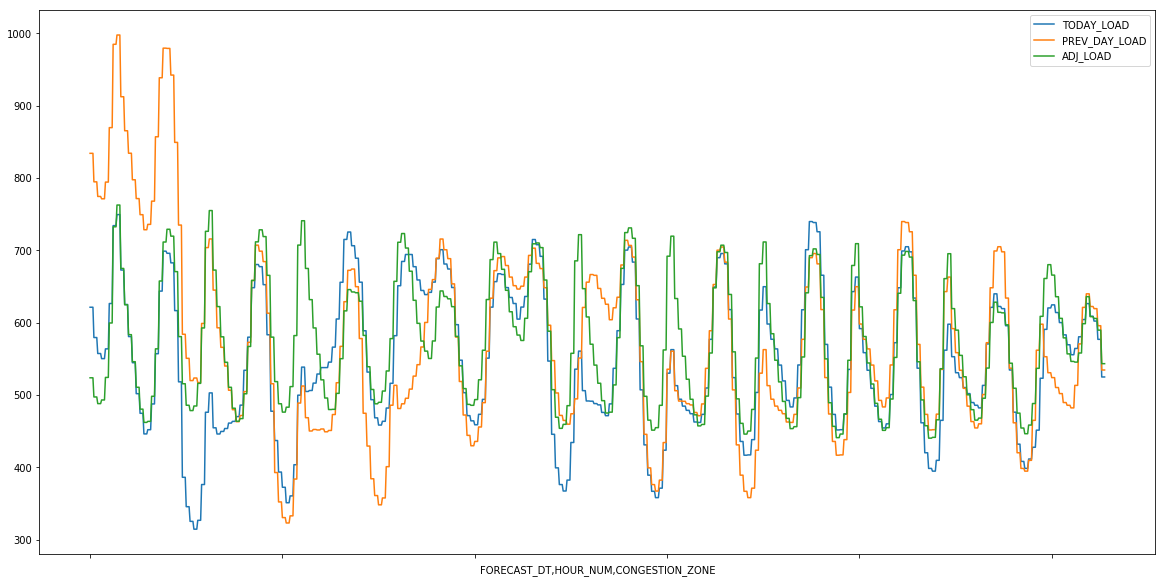

In [41]:
#Test plot to see how the final graph should approximately look like.

### Start Lab Here